### Задание №1: Загрузите датасет ("Clients_aggregated_data.xlsx") из директории lesson_notebook_data и проведите беглый осмотр данных. Если необходимо:
1) Преобразуйте данные  
2) Приведите данные к Tidy виду
    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random
import os
import regex
import warnings

#import sklearn
#import tensorflow as tf

pd.options.display.max_columns = 100
pd.options.display.max_rows =  200
pd.options.display.max_info_rows = 1690785
pd.options.display.max_info_columns = 200
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.date_dayfirst = True

from google.colab import drive, files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/work/portfolio/СТОСД Аналитика/4 Tidy data/Clients_aggregated_data.xlsx')
df.head(5)

,account_type_plus_risk_level,marital_status,education_level,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06
0,broker account_-,-,-,NaN,25.00,94.00,20.00,18.00,15.00,25.00,38.00,43.00,20.00,28.00,17.00,21.00,34.00,25.00,20.00,33.00,36.00,31.00,40.00,95.00,54.00,49.00,119.00,136.00,113.00,104.00,82.00,110.00,136.00,234.00,166.00,160.00,167.00,256.00,282.00,205.00,148.00,138.00,128.00,138.00,99.00,185.00,233.00,139.00,143.00,148.00,307.00,173.00,156.00,98.00,59.00,44.00,52.00,70.00,33.00,29.00,27.00,28.00,23.00,13.00,14.00,NaN
1,broker account_high risk,-,-,1.00,28.00,73.00,18.00,28.00,28.00,28.00,53.00,41.00,29.00,32.00,17.00,23.00,28.00,30.00,30.00,29.00,54.00,30.00,55.00,87.00,52.00,48.00,122.00,133.00,89.00,83.00,74.00,79.00,80.00,171.00,103.00,90.00,86.00,177.00,130.00,112.00,77.00,110.00,100.00,91.00,105.00,132.00,103.00,51.00,94.00,66.00,86.00,31.00,30.00,27.00,25.00,20.00,25.00,21.00,16.00,14.00,17.00,11.00,15.00,11.00,13.00,1.00
2,broker account_low risk,-,-,NaN,NaN,11.00,3.00,2.00,5.00,9.00,6.00,3.00,4.00,6.00,4.00,5.00,2.00,5.00,4.00,1.00,9.00,6.00,14.00,31.00,14.00,9.00,33.00,29.00,33.00,21.00,22.00,28.00,21.00,41.00,36.00,20.00,22.00,36.00,28.00,22.00,27.00,16.00,26.00,28.00,74.00,5.00,5.00,2.00,3.00,1.00,NaN,1.00,1.00,NaN,1.00,NaN,NaN,1.00,2.00,NaN,NaN,1.00,1.00,NaN,NaN,NaN
3,broker account_medium risk,-,-,NaN,18.00,59.00,12.00,10.00,15.00,28.00,33.00,31.00,15.00,28.00,23.00,31.00,30.00,22.00,30.00,37.00,47.00,32.00,77.00,91.00,57.00,60.00,128.00,129.00,95.00,75.00,95.00,94.00,120.00,183.00,112.00,75.00,105.00,176.00,143.00,121.00,96.00,105.00,99.00,98.00,140.00,139.00,73.00,52.00,60.00,36.00,57.00,23.00,20.00,15.00,4.00,8.00,13.00,5.00,7.00,6.00,6.00,12.00,2.00,NaN,NaN,NaN
4,broker account_-,-,Второе высшее,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,1.00,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.melt(df, id_vars=['account_type_plus_risk_level', 'marital_status', 'education_level'], value_vars=df.columns[3:], var_name='date', value_name='user_count')
df = df.fillna(0)
df['date'] = pd.to_datetime(df['date'])
df[['account_type', 'risk_level']] = df['account_type_plus_risk_level'].str.split('_', expand=True)
df = df.drop('account_type_plus_risk_level', axis=1)
df.head(5)

,marital_status,education_level,date,user_count,account_type,risk_level
0,-,-,2018-04-01,0.00,broker account,-
1,-,-,2018-04-01,1.00,broker account,high risk
2,-,-,2018-04-01,0.00,broker account,low risk
3,-,-,2018-04-01,0.00,broker account,medium risk
4,-,Второе высшее,2018-04-01,0.00,broker account,-


In [ ]:
df.isna().sum()

marital_status     0
education_level    0
date               0
user_count         0
account_type       0
risk_level         0
dtype: int64

In [ ]:
df['risk_level'].value_counts()

medium risk    3465
-              3213
high risk      3213
low risk       2772
Name: risk_level, dtype: int64

In [ ]:
def probs_replace(srs, values):
  '''
  Probabilistically replaces target values in a series (target column). Returns a series copy
  '''
  if not hasattr(values, '__iter__') or isinstance(values, str):
    values = [values]

  map_series = srs.value_counts().drop(index=values)
  map_series = map_series / map_series.sum()

  srs = srs.copy(deep=True)
  srs[srs.isin(values)] = np.random.choice(map_series.index, size = (srs.isin(values)).sum(), p = map_series.values)
  return srs

In [ ]:
df['marital_status'] = probs_replace(df['marital_status'], '-')
df['marital_status'].value_counts()

unmarried    2918
married      2889
civil        2591
divorced     2474
widow        1791
Name: marital_status, dtype: int64

In [ ]:
df['risk_level'] = probs_replace(df['risk_level'], '-')
df['risk_level'].value_counts()

medium risk    4620
high risk      4327
low risk       3716
Name: risk_level, dtype: int64

In [ ]:
df['education_level'] = probs_replace(df['education_level'], '-')
df['education_level'] = df['education_level'].replace({'Два и более высших' : 'Второе высшее'})
df['education_level'].value_counts()

Высшее                3781
Начальное, среднее    3590
Второе высшее         3288
Ученая степень        2004
Name: education_level, dtype: int64

In [ ]:
#этот столбец на русском, а остальные на английском. Переведем все в английский
df['education_level'] = df['education_level'].replace({'Высшее' : 'graduate',
                                                       'Начальное, среднее' : 'non-graduate',
                                                       'Второе высшее' : '2 degrees',
                                                       'Ученая степень' : 'PhD'})

In [ ]:
df.head(-5)

,marital_status,education_level,date,user_count,account_type,risk_level
0,married,graduate,2018-04-01,0.00,broker account,medium risk
1,married,graduate,2018-04-01,1.00,broker account,high risk
2,married,graduate,2018-04-01,0.00,broker account,low risk
3,married,graduate,2018-04-01,0.00,broker account,medium risk
4,married,2 degrees,2018-04-01,0.00,broker account,medium risk
...,...,...,...,...,...,...
12653,unmarried,PhD,2023-06-01,0.00,broker saving account,low risk
12654,unmarried,PhD,2023-06-01,0.00,broker saving account,medium risk
12655,widow,non-graduate,2023-06-01,0.00,broker saving account,high risk
12656,widow,non-graduate,2023-06-01,0.00,broker saving account,medium risk


### Задание №2: Проанализируйте, как изменялась клиентская база. Ответьте на вопросы, подкрепив заключения визуализацией данных:
1) Как в абсолютных и относительных единицах менялась численность клиентов брокера?  
2) Как изменялась численность клиентов брокера с точки зрения брачного статуса клиентов  
3) Есть ли тенденции в изменении количества клиентов с точки зрения образования?  
4) Как можно охарактеризовать процесс риск-профилирования клиентов брокера и риск-аппетит брокера?

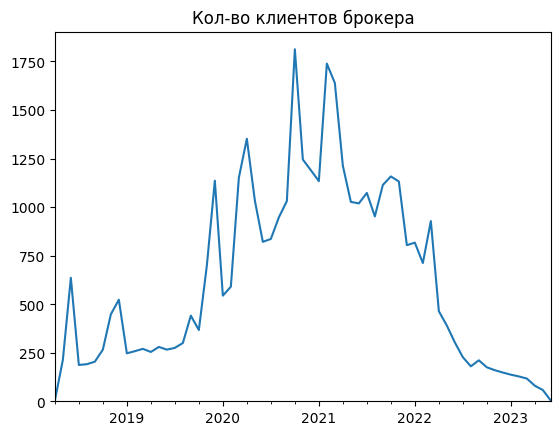

In [ ]:
df.groupby('date')['user_count'].sum().plot()

plt.title('Кол-во клиентов брокера')
plt.ylim(bottom=0)
plt.xlabel('');

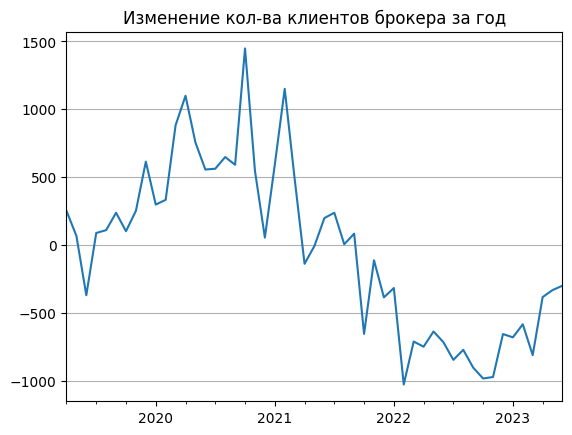

In [ ]:
srs = df.groupby('date')['user_count'].sum()

srs.diff(periods=12)[12:].plot()
plt.title('Изменение кол-ва клиентов брокера за год')
#plt.axhline(y=0.5, color='black', linestyle='-', alpha=.25)
plt.grid(axis='y')
plt.xlabel('');

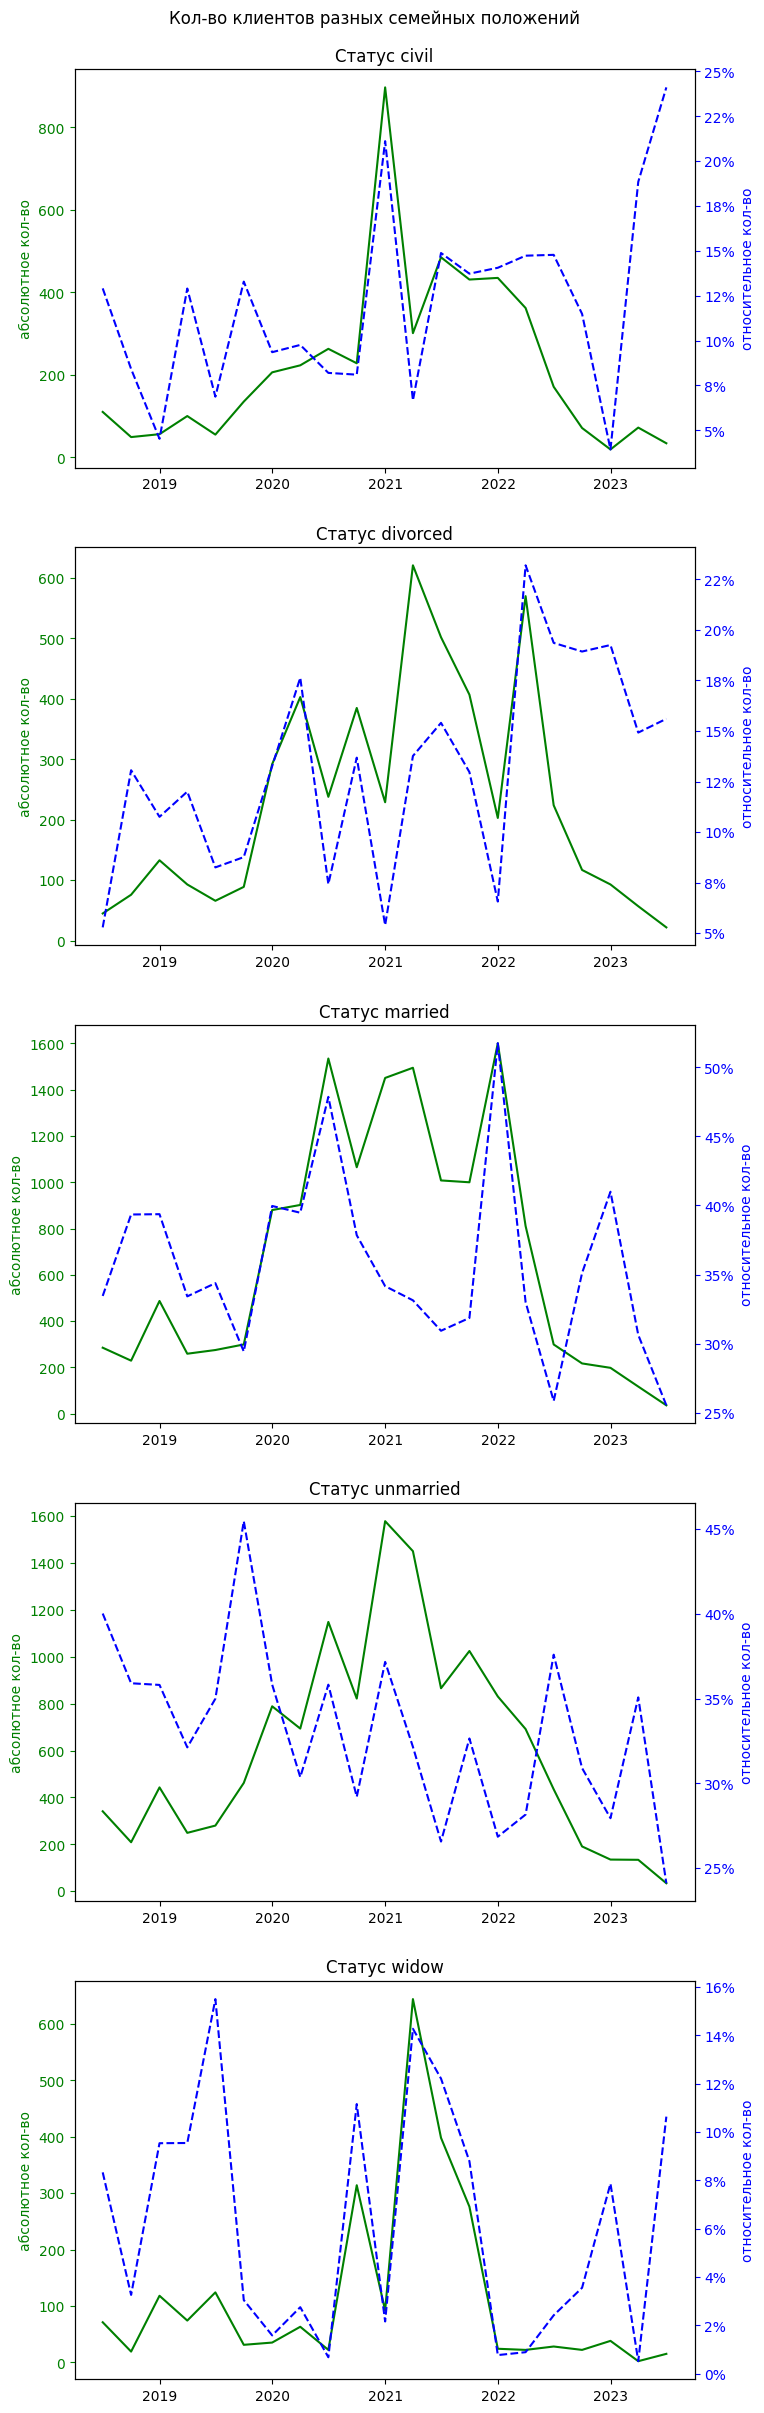

In [ ]:
out = df.groupby([df['date'].dt.to_period('Q'), 'marital_status'])['user_count'].sum().unstack(level=1)
out['total'] = out.sum(axis=1)


features = df['marital_status'].nunique()

fig, axs = plt.subplots(features, 1, figsize=(8, 6*features))

#matplotlib (пока) не работает с кварталами pandas'а,
#поэтому можно перевести наши кварталы в первый день соот. кваратала с помощью:
#out.index = out.index.to_timestamp()

#так как все даты одинаковы для наших графиков, мы просто сгенерируем
#один date_range для всех графиков
xs = pd.date_range(out.index[0].to_timestamp(), periods=out.shape[0], freq='Q')

for i in range(features):
  display_data = out.iloc[:, i]

  axs[i].plot(xs, display_data.values, 'g-')
  twinx = axs[i].twinx()
  twinx.plot(xs, display_data / out['total'], 'b--')

  twinx.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:.0%}'))

  axs[i].tick_params(axis='y', colors='g')
  twinx.tick_params(axis='y', colors='b')

  axs[i].set_ylabel('абсолютное кол-во', color='g')
  twinx.set_ylabel('относительное кол-во', color='b')
  plt.title(f'Статус {display_data.name}')

plt.suptitle('Кол-во клиентов разных семейных положений', y=.9);

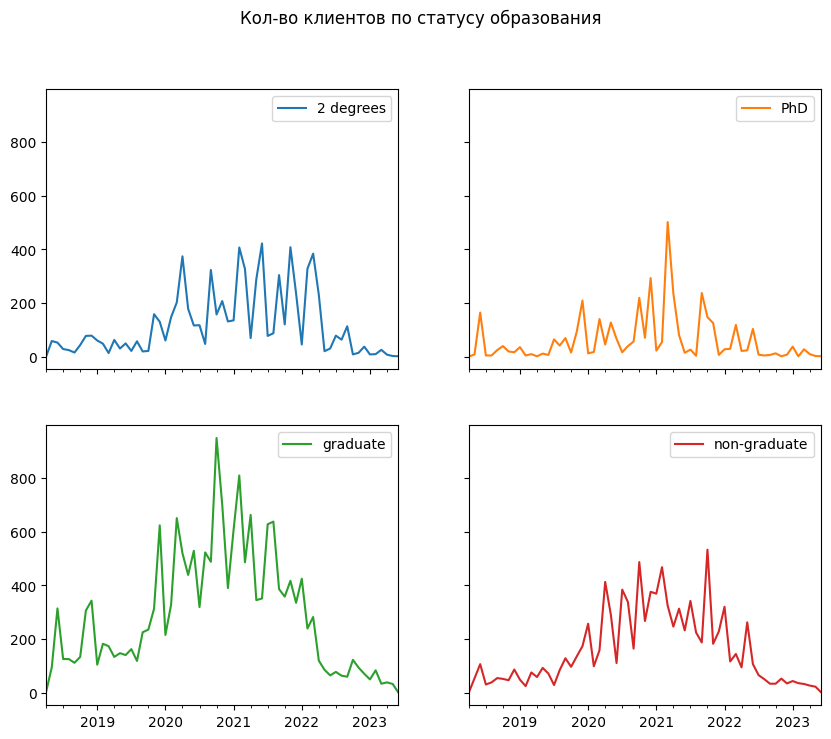

In [ ]:
pd.pivot_table(df, index='date', columns='education_level', values='user_count', aggfunc='sum').plot(
    subplots=True, figsize=(10,8), layout=(2,2), sharex=True, sharey=True, title='Кол-во клиентов по статусу образования', xlabel='');

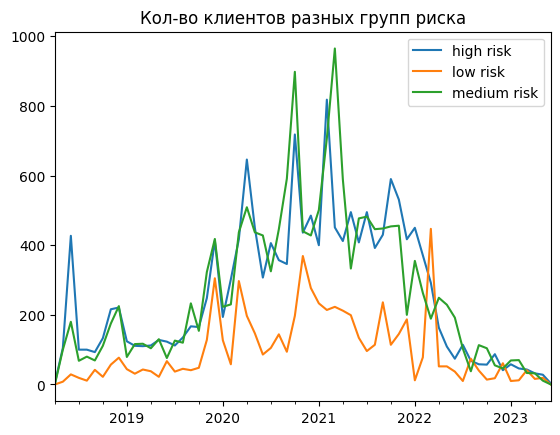

In [ ]:
df.groupby(['date', 'risk_level'], as_index=False)['user_count'].sum().set_index('date').groupby('risk_level')['user_count'].plot()
plt.xlabel('')
plt.title('Кол-во клиентов разных групп риска')
plt.legend();

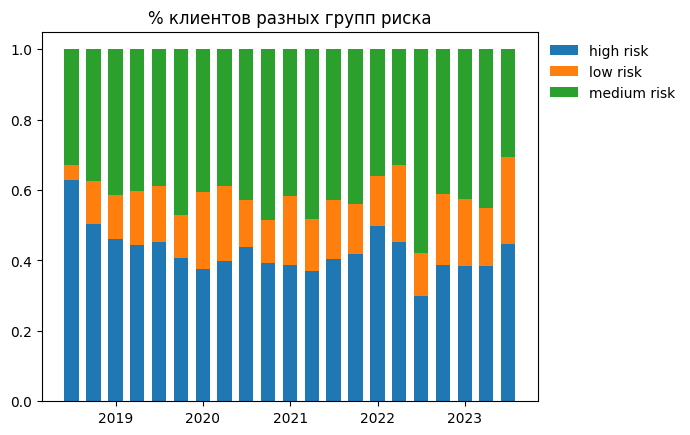

In [ ]:
out = df.groupby([df['date'].dt.to_period('Q'), 'risk_level'])['user_count'].sum().unstack(level=1)
out = out.div(out.sum(axis=1), axis=0)

fig, ax = plt.subplots()

xs = pd.date_range(out.index[0].to_timestamp(), periods=out.shape[0], freq='Q')

bottom = np.zeros(len(xs))
for col in out.columns:
  ax.bar(xs, out[col], width=60, label=col, bottom=bottom)
  bottom += out[col]


plt.title('% клиентов разных групп риска')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False);

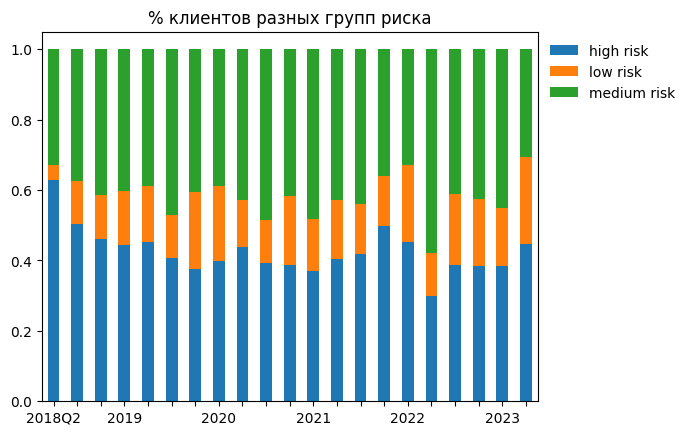

In [ ]:
#альтернативный способ построения графика выше
#проще,но грубее
out = df.groupby([df['date'].dt.to_period('Q'), 'risk_level'])['user_count'].sum().unstack(level=1)
out = out.div(out.sum(axis=1), axis=0)

out.plot(kind='bar', stacked=True)

ticks, labels = plt.xticks()
for label in labels[1:]:
  if label._text[-2:] == 'Q1':
     label._text = label._text[:-2]
  else:
    label._text = ''
plt.xticks(ticks, labels, rotation=0)


plt.title('% клиентов разных групп риска')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False);